<a href="https://colab.research.google.com/github/faisall73/10222039_MuhammadFaisalMubarok_TM/blob/main/102220039_MFaisalMubarok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', encoding='latin-1')
data.head()


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


## Penjelasan Dataset yang digunakan

In [38]:
# 📦 Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [39]:
# Load Data
import pandas as pd
data = pd.read_csv("test.csv")
print(data.columns)
data.head()


Index(['ID', 'TITLE', 'ABSTRACT'], dtype='object')


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


## Data Understanding

In [44]:
# 📊 1. Jumlah baris data
import pandas as pd

data = pd.read_csv("test.csv")

print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])


Jumlah baris: 8989
Jumlah kolom: 3


In [45]:
# 📏 2. Panjang rata-rata setiap baris.

def row_length(row):
    return sum(len(str(x)) for x in row)

rata_rata_panjang = data.apply(row_length, axis=1).mean()
print("Panjang rata-rata setiap baris:", rata_rata_panjang)


Panjang rata-rata setiap baris: 1086.8129936589164


In [46]:
# 🔍 3. Cek data duplikasi
jumlah_duplikasi = data.duplicated().sum()

print("Jumlah data duplikat:", jumlah_duplikasi)

if jumlah_duplikasi > 0:
    print("\nContoh data duplikat:")
    display(data[data.duplicated()].head())

Jumlah data duplikat: 0


In [47]:
# 8. Cek Data Kosong

print("Jumlah nilai kosong tiap kolom:\n")
print(data.isnull().sum())

persentase_kosong = (data.isnull().sum() / len(data)) * 100
print("\nPersentase nilai kosong tiap kolom (%):\n")
print(persentase_kosong)

Jumlah nilai kosong tiap kolom:

ID          0
TITLE       0
ABSTRACT    0
dtype: int64

Persentase nilai kosong tiap kolom (%):

ID          0.0
TITLE       0.0
ABSTRACT    0.0
dtype: float64


Kolom dalam dataset: Index(['ID', 'TITLE', 'ABSTRACT'], dtype='object')


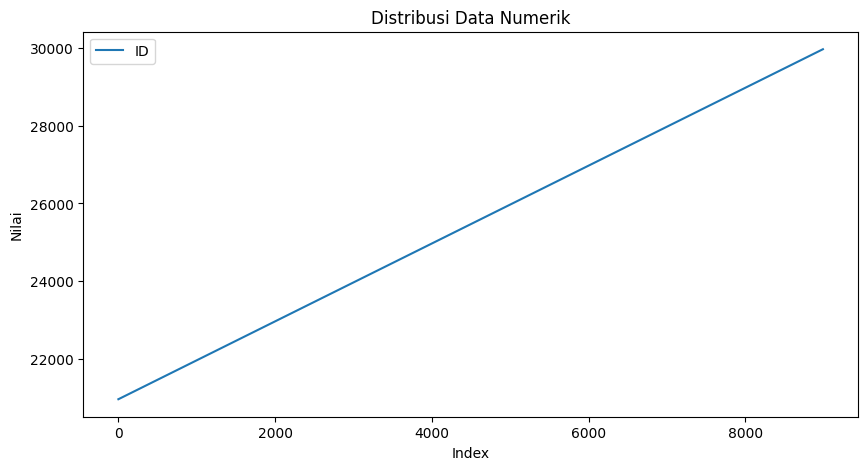

In [48]:
# 📈 5. Distribusi data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
print("Kolom dalam dataset:", data.columns)

if 'label' in data.columns:
    data['label'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Distribusi Label")
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah Data")
    plt.show()

elif 'text' in data.columns:
    text = " ".join(str(x) for x in data['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud dari Kolom Teks")
    plt.show()

else:
    data.plot(kind='line', figsize=(10,5))
    plt.title("Distribusi Data Numerik")
    plt.xlabel("Index")
    plt.ylabel("Nilai")
    plt.show()


In [49]:
import pandas as pd

data = pd.read_csv("test.csv")
print("test.csv")
print(data.columns)
data.head()


test.csv
Index(['ID', 'TITLE', 'ABSTRACT'], dtype='object')


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [50]:
#1. Tokenisasi
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

data = pd.read_csv("test.csv")

obj_cols = data.select_dtypes(include=['object', 'string']).columns.tolist()

if not obj_cols:
    raise ValueError("Tidak ada kolom teks yang terdeteksi di dataset.")

def avg_len(col):
    return data[col].astype(str).map(len).mean()

text_col = max(obj_cols, key=avg_len)
print(f"Kolom teks yang digunakan untuk analisis: '{text_col}'")

nltk.download('punkt', quiet=True)


data['tokens'] = data[text_col].astype(str).apply(word_tokenize)
print("\nContoh hasil tokenisasi:")
display(data[[text_col, 'tokens']].head())




Kolom teks yang digunakan untuk analisis: 'ABSTRACT'

Contoh hasil tokenisasi:


,ABSTRACT,tokens
0,We present novel understandings of the Gamma...,"[We, present, novel, understandings, of, the, ..."
1,Meteorites contain minerals from Solar Syste...,"[Meteorites, contain, minerals, from, Solar, S..."
2,Frame aggregation is a mechanism by which mu...,"[Frame, aggregation, is, a, mechanism, by, whi..."
3,Milky Way open clusters are very diverse in ...,"[Milky, Way, open, clusters, are, very, divers..."
4,Proving that a cryptographic protocol is cor...,"[Proving, that, a, cryptographic, protocol, is..."


In [52]:
#2. Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

lemmatizer = WordNetLemmatizer()

data['lemmatized'] = data['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w.lower()) for w in tokens])
print("Contoh hasil lemmatization:")
display(data[['lemmatized']].head())



Contoh hasil lemmatization:


,lemmatized
0,"[we, present, novel, understanding, of, the, g..."
1,"[meteorite, contain, mineral, from, solar, sys..."
2,"[frame, aggregation, is, a, mechanism, by, whi..."
3,"[milky, way, open, cluster, are, very, diverse..."
4,"[proving, that, a, cryptographic, protocol, is..."


In [53]:
# 3. Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
data['stemmed'] = data['lemmatized'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

print("Contoh hasil stemming:")
display(data[['stemmed']].head())


Contoh hasil stemming:


,stemmed
0,"[we, present, novel, understand, of, the, gamm..."
1,"[meteorit, contain, miner, from, solar, system..."
2,"[frame, aggreg, is, a, mechan, by, which, mult..."
3,"[milki, way, open, cluster, are, veri, divers,..."
4,"[prove, that, a, cryptograph, protocol, is, co..."


In [56]:
#4. Stopword Removal
import string
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned = []
    for w in tokens:
        w = w.lower()
        if w not in stop_words and w.isalpha():
            cleaned.append(w)
    return cleaned

data['clean_tokens'] = data['stemmed'].apply(clean_tokens)
print("Contoh hasil setelah stopword removal:")
display(data[['clean_tokens']].head())


Contoh hasil setelah stopword removal:


,clean_tokens
0,"[present, novel, understand, gap, model, proba..."
1,"[meteorit, contain, miner, solar, system, aste..."
2,"[frame, aggreg, mechan, multipl, frame, combin..."
3,"[milki, way, open, cluster, veri, divers, term..."
4,"[prove, cryptograph, protocol, correct, secrec..."


In [57]:
#5. Text Normalisasi
data['normalized_text'] = data['clean_tokens'].apply(lambda x: " ".join(x))

print("Contoh hasil normalisasi teks:")
display(data[['normalized_text']].head())


Contoh hasil normalisasi teks:


,normalized_text
0,present novel understand gap model probabilist...
1,meteorit contain miner solar system asteroid d...
2,frame aggreg mechan multipl frame combin singl...
3,milki way open cluster veri divers term age ch...
4,prove cryptograph protocol correct secreci har...


In [58]:
#7. Text Vektorisasi (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(data['normalized_text'])

print("Ukuran matriks TF-IDF:", X_tfidf.shape)
print("\n10 fitur teratas:")
print(vectorizer.get_feature_names_out()[:10])


Ukuran matriks TF-IDF: (8989, 1000)

10 fitur teratas:
['abil' 'abl' 'abov' 'abstract' 'acceler' 'access' 'accord' 'account'
 'accur' 'accuraci']


## Data Modeling
Model yang digunakan: Naive Bayes (MultinomialNB)

Alasan pemilihan:
- Cocok untuk klasifikasi teks.
- Cepat dan efisien untuk data besar.
- Berdasarkan Teorema Bayes dengan asumsi fitur saling independen.

Tujuan:
Memprediksi kelas teks berdasarkan probabilitas kemunculan kata.


## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

🔠 10 Kata yang Paling Sering Muncul:


,Kata,Frekuensi
0,the,79472
1,.,56633
2,",",56486
3,of,55893
4,and,35181
5,a,33746
6,$,30270
7,to,28604
8,in,22709
9,is,18585


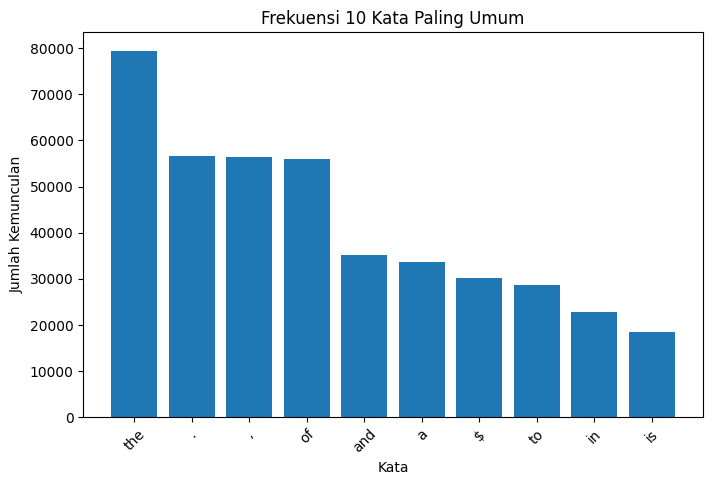

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

all_tokens = list(chain.from_iterable(data['tokens']))

word_freq = Counter(all_tokens)

top_words = pd.DataFrame(word_freq.most_common(10), columns=['Kata', 'Frekuensi'])

print("🔠 10 Kata yang Paling Sering Muncul:")
display(top_words)

plt.figure(figsize=(8,5))
plt.bar(top_words['Kata'], top_words['Frekuensi'])
plt.title("Frekuensi 10 Kata Paling Umum")
plt.xlabel("Kata")
plt.ylabel("Jumlah Kemunculan")
plt.xticks(rotation=45)
plt.show()


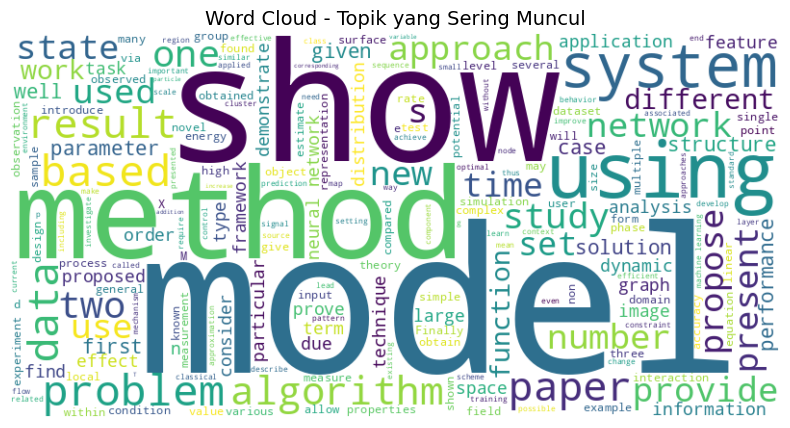

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Topik yang Sering Muncul", fontsize=14)
plt.show()


##Menggunakan implementasi menggunakan PCA

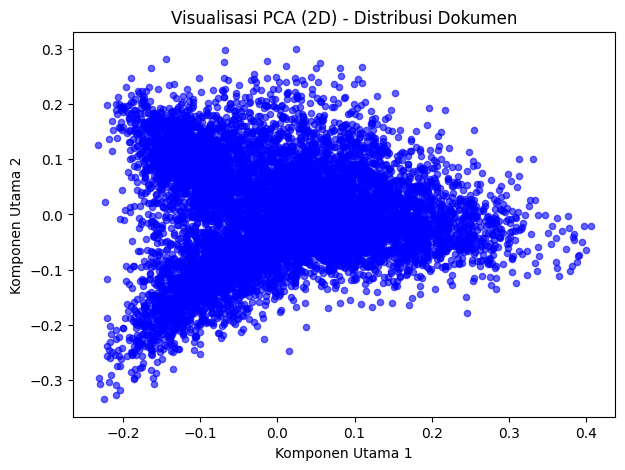

In [62]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_dense = X_tfidf.toarray()

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_dense)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=20, c='blue', alpha=0.6)
plt.title("Visualisasi PCA (2D) - Distribusi Dokumen")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()

